<h1>Preparation</h1>
<li>Download the nltk corpus (see below)
<li>Download data.zip from canvas and unzip it in a local folder in your directory
<li>Copy the files: data/2013-Obama.txt and data/2017-Trump.txt to:
<ul>
<li>~/nltk_data/corpora/inaugural/ (~ indicates your home directory)

In [3]:
# !conda install nltk --yes
# !pip install nltk

In [1]:
#YOU NEED TO RUN THIS ONLY ONCE!
import nltk
# nltk.download()

<h1>Working with text!</h1>


<h2>nltk: Python's natural language toolkit</h2>


<h3>ntlk documentation link:</h3> http://www.nltk.org/api/nltk.html
<h3>Commands cheat sheet</h3> https://blogs.princeton.edu/etc/files/2014/03/Text-Analysis-with-NLTK-Cheatsheet.pdf
<h3>nltk book</h3>http://www.nltk.org/book/

<h2>Types of analysis</h2>
<li>Sentiment analysis: Deciding whether a document (or concept) is positive or negative
<li>Entity analysis: Identifying entities (Named entities, Parts of speech) and properties of these entities
<li>Topic analysis: Deciding what the major topics associated with a piece of text
<li>Text summarization: Summarizing a document (Cliff notes version!)

<h2>Sentiment Analysis</h2>
Identify entities and emotions in a sentence and use these to determine if the entity is being viewed positively or negatively

<h3>Easy examples</h3>
<li>I had an <b style="color:green">excellent</b> souffle at the restaurant Cavity Maker</li>
<li>Excellent is a positive word for both the souffle as well as for the restaurant</li>

<h3>Not so easy examples</h3>
<h4>Often, looking at words alone is not enough to figure out the sentiment</h4>
<li><i>The Girl on the Train is an <span style="color:green">excellent</span> book for a ‘stuck at home’ snow day</i></li> This one is easy since it includes an explicit positive opinion using a positive word
<li><i>The Girl on the Train is an <span style="color:green">excellent</span> book for using as a liner for your cat’s litter box</i></li> Not so simple! The positive word "excellent" is used with a negative connotation. 
<li><i>The Girl on the Train is <span style="color:green">better</span> than Gone Girl</i></li> The positive word is used as a comparator. Whether the writer likes The Girl on the Train or not depends on what he or she thinks of Gone Girl

<h4>Bottom line</h4>
Sentiment analysis is generally a starting point in analyzing a text and is then coupled with other techniques (e.g., topic analysis)

<h2>Sentiment analysis is usually done using a corpus of positive and negative words</h2>
<li>Some sources compile lists of positive and negative words
<li>Others include the polarity - the degree of positivity or negativity - of each word

<h2>Sources of sentiment coded words</h2>
<ol>
<li>Hu and Liu's sentiment analysis lexicon: words coded as either positive or negative</li>
<ul>
<li>http://ptrckprry.com/course/ssd/data/positive-words.txt
<li>http://ptrckprry.com/course/ssd/data/negative-words.txt
</ul>
<li>NRC Emotion Lexicon: words coded into emotional categories (many languages)</li>
<ul>
<li>http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm</li>
</ul>
<li>SentiWordNet: Lists of words weighted by positive or negative sentiment. Includes guidance on how to use the words</li>
<ul>
<li>http://sentiwordnet.isti.cnr.it/</li>
</ul>
<li>Vadar Sentiment tool: 7800 words with positive or negative polarity</li>
<ul>
<li>Included with python nltk</li>
</ul>
</ol>

<h2>Our examples</h2>
<li>Compiled set of reviews of neighborhood restaurants
<li>Presidential inaugural addresses (from Washington to Trump)
<li>Some data from yelp using the yelp API

<h3>Simple sentiment analysis</h3>
Compute the proportion of positive and negative words in a text

In [2]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)
            else:
                index+=1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

positive_words,negative_words = get_pos_neg_words()

<h4>Read the text being analyzed and count the proportion of positive and negative words in the text</h4>
<li>We'll look at the reviews of two restaurants in the Morningside Heights neighborhood

In [2]:
with open('/home/uday/Documents/Columbia_University/DataAnalytics-Fall2019/Week 6: text mining/data/community.txt','r') as f:
    community = f.read()
with open('/home/uday/Documents/Columbia_University/DataAnalytics-Fall2019/Week 6: text mining/data/le_monde.txt','r') as f:
    le_monde = f.read()


<h4>Compute sentiment by looking at the proportion of positive and negative words in the text</h4>

In [3]:
from nltk import word_tokenize
cpos = cneg = lpos = lneg = 0
for word in word_tokenize(community):
    if word in positive_words:
        cpos+=1
    if word in negative_words:
        cneg+=1
for word in word_tokenize(le_monde):
    if word in positive_words:
        lpos+=1
    if word in negative_words:
        lneg+=1
print("community {0:1.2f}%\t {1:1.2f}%\t {2:1.2f}%".format(cpos/len(word_tokenize(community))*100,
                                                        cneg/len(word_tokenize(community))*100,
                                                        (cpos-cneg)/len(word_tokenize(community))*100))
print("le monde  {0:1.2f}%\t {1:1.2f}%\t {2:1.2f}%".format(lpos/len(word_tokenize(le_monde))*100,
                                                        lneg/len(word_tokenize(le_monde))*100,
                                                        (lpos-lneg)/len(word_tokenize(le_monde))*100))


community 5.09%	 1.12%	 3.97%
le monde  5.33%	 1.49%	 3.85%


<h2>Let's functionalize this</h2>

In [4]:
def do_pos_neg_sentiment_analysis(text_list,debug=False):
    positive_words,negative_words = get_pos_neg_words()
    from nltk import word_tokenize
    results = list()
    for text in text_list:
        cpos = cneg = lpos = lneg = 0
        for word in word_tokenize(text[1]):
            if word in positive_words:
                if debug:
                    print("Positive",word)
                cpos+=1
            if word in negative_words:
                if debug:
                    print("Negative",word)
                cneg+=1
        results.append((text[0],cpos/len(word_tokenize(text[1])),cneg/len(word_tokenize(text[1]))))
    return results

do_pos_neg_sentiment_analysis([('community',community),('le_monde',le_monde)])

[('community', 0.0508646998982706, 0.011190233977619531),
 ('le_monde', 0.053342336259284265, 0.014854827819041188)]

<h2>Simple sentiment analysis using NRC data</h2>
<li>NRC data codifies words with emotions</li>
<li>14,182 words are coded into 2 sentiments and 8 emotions</li>


<h4>For example, the word abandonment is associated with anger, fear, sadness and has a negative sentiment</h4>
<li>abandoned	anger	1
<li>abandoned	anticipation	0
<li>abandoned	disgust	0
<li>abandoned	fear	1
<li>abandoned	joy	0
<li>abandoned	negative	1
<li>abandoned	positive	0
<li>abandoned	sadness	1
<li>abandoned	surprise	0
<li>abandoned	trust	0

<h4>Read the NRC sentiment data</h4>

In [5]:
nrc = "/home/uday/Documents/Columbia_University/DataAnalytics-Fall2019/Week 6: text mining/data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
count=0
emotion_dict=dict()
with open(nrc,'r') as f:
    all_lines = list()
    for line in f:
        if count < 46:
            count+=1
            continue
        line = line.strip().split('\t')
        if int(line[2]) == 1:
            if emotion_dict.get(line[0]):
                emotion_dict[line[0]].append(line[1])
            else:
                emotion_dict[line[0]] = [line[1]]
        

<h4>Functionalize this</h4>

In [4]:
def get_nrc_data():
    nrc = "/home/uday/Documents/Columbia_University/DataAnalytics-Fall2019/Week 6: text mining/data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [7]:
emotion_dict['abandoned']

['anger', 'fear', 'negative', 'sadness']

In [6]:
emotion_dict = get_nrc_data()
emotion_dict['abandoned']

['anger', 'fear', 'negative', 'sadness']

<h1>Yelp API</h1>
<li>https://www.yelp.com/developers/documentation/v3
<li>log into yelp (top right hand corner of the page)
<li>Click <span style="color:blue">Create App</span> on the left hand menu bar
<li>Enter app info (leave optional stuff blank)
<li>Copy the client id and client secret to a secure place (this notebook should do the trick or use a text file!)

In [ ]:
CLIENT_ID = ""
API_KEY = ""

In [13]:
with open('/home/uday/Documents/Columbia_University/API_Keys/yelp_credentials.txt','r') as f:
    count = 0
    for line in f:
        if count == 0:
            CLIENT_ID = line.strip()
        if count == 1:
            API_KEY = line.strip()
        count+=1


In [ ]:
print(CLIENT_ID,API_KEY)

In [14]:
# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com' #The API url header
SEARCH_PATH = '/v3/businesses/search' #The path for an API request to find businesses
BUSINESS_PATH = '/v3/businesses/'  # The path to get data for a single business

<h3>Now we can get reviews</h3>
<li>get_reviews(location,number=15) returns the reviews of "number" (default=15) restaurants in the vicinity of "location"
<li>First, we'll write a function that gets  restaurants in the vicinity of location



In [20]:
def get_restaurants(api_key,location,number=15):
    import requests
    
    #First we get the access token
    #Set up the search data dictionary
    search_data = {
    'term': "restaurant",
    'location': location.replace(' ', '+'),
    'limit': number
    }
    url = API_HOST + SEARCH_PATH
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }
    response = requests.request('GET', url, headers=headers, params=search_data).json()
    businesses = response.get('businesses')
    return businesses

In [21]:
get_restaurants(API_KEY,"Columbia University, New York, NY")

[{'alias': 'the-tang-upper-west-side-new-york',
  'categories': [{'alias': 'chinese', 'title': 'Chinese'},
   {'alias': 'noodles', 'title': 'Noodles'},
   {'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}],
  'coordinates': {'latitude': 40.80006, 'longitude': -73.96639},
  'display_phone': '(646) 596-7970',
  'distance': 903.4027170159933,
  'id': 'TzhAlljC_843JO7UDDUIaQ',
  'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/uNjNuc-pjoRbYNpompLGWw/o.jpg',
  'is_closed': False,
  'location': {'address1': '920 Amsterdam Ave',
   'address2': None,
   'address3': '',
   'city': 'New York',
   'country': 'US',
   'display_address': ['920 Amsterdam Ave', 'New York, NY 10025'],
   'state': 'NY',
   'zip_code': '10025'},
  'name': 'The Tang - Upper West Side',
  'phone': '+16465967970',
  'price': '$$',
  'rating': 4.5,
  'review_count': 131,
  'transactions': ['restaurant_reservation', 'pickup', 'delivery'],
  'url': 'https://www.yelp.com/biz/the-tang-upper-west-side-new-york?adj

<h4>Then a function that, given a business id, returns a string containing the reviews</h4>


In [18]:
def get_business_review(api_key,business_id):
    import json
    import requests
    business_path = BUSINESS_PATH + business_id+"/reviews"
    url = API_HOST + business_path

    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }


    response = requests.request('GET', url, headers=headers).json()
   
    review_text = ''
    for review in response['reviews']:
        review_text += review['text']
    return review_text

In [19]:
get_business_review(API_KEY,'flat-top-new-york')

"I think I found my new brunch spot! I had a brunch date with my bestfriend and we really enjoy our \ntime. \nThe staff are friendly and the food was tasty....I don't usually leave a review, but when I do, It's because the experience was exceptional or beyond terrible. Well this time, it was the latter. Food was...Service was extremely slow, which they apologized for. But they should let people know they are understaffed and service will be slow prior to sitting us...."

<h4>Finally, put all this together to get review data for the set of restaurants</h4>


In [22]:
def get_reviews(location,number=15):

    restaurants = get_restaurants(API_KEY,location,number)

    if not restaurants:
        return None
    review_list = list()
    for restaurant in restaurants:
        restaurant_name = restaurant['name']
        restaurant_id = restaurant['id']
        review_text = get_business_review(API_KEY,restaurant_id)
        
        review_list.append((restaurant_name,review_text))
    return review_list
        


In [23]:
all_snippets = get_reviews("Columbia University, New York, NY")

In [24]:
all_snippets

[('The Tang - Upper West Side',
  'My visit here has been nothing but a treat! First the interior and attention to detail in every design is incredible. You are instantly transported to a...Came here on a Tuesday night and the place was pretty packed throughout the night. \n\nThe Favs--\n\nFried Tiger Prawn with Salted Egg Yolk Plate:  maybe I have...I really enjoyed my meal here at The Tang. Some items can be slightly pricey, but overall, decent portion sizes and you can definitely get extremely filled...'),
 ('Flat Top',
  "I think I found my new brunch spot! I had a brunch date with my bestfriend and we really enjoy our \ntime. \nThe staff are friendly and the food was tasty....I don't usually leave a review, but when I do, It's because the experience was exceptional or beyond terrible. Well this time, it was the latter. Food was...Service was extremely slow, which they apologized for. But they should let people know they are understaffed and service will be slow prior to sitting us

<h2>A function that analyzes emotions</h2>

In [8]:
def emotion_analyzer(text,emotion_dict=emotion_dict):
    #Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y}  # this is a set. It collects the unique emotions, although not very efficient way of doing so.
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    #Analyze the text and normalize by total number of words
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

<h4>Now we can analyze the emotional content of the review snippets</h4>

In [26]:
print("%-12s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(
        "restaurant","fear","trust","negative","positive","joy","disgust","anticip",
        "sadness","surprise"))
        
for snippet in all_snippets:    # note that snippet[0] is the name of the restaurant.
    text = snippet[1]
    result = emotion_analyzer(text)
    print("%-12s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
        snippet[0][0:10],result['fear'],result['trust'],           # snippet[0] is the name of the restaurant.
          result['negative'],result['positive'],result['joy'],result['disgust'],
          result['anticipation'],result['sadness'],result['surprise']))


restaurant   fear	trust negative positive joy   disgust anticip sadness surprise
The Tang -   0.00	0.03	0.00	0.06	0.01	0.01	0.01	0.00	0.00
Flat Top     0.00	0.05	0.01	0.05	0.05	0.00	0.02	0.01	0.01
Jin Ramen    0.01	0.03	0.01	0.06	0.05	0.00	0.05	0.01	0.02
Nobody Tol   0.00	0.03	0.00	0.05	0.03	0.00	0.03	0.00	0.01
The Calave   0.00	0.02	0.00	0.02	0.02	0.00	0.01	0.00	0.00
Lolo's Sea   0.00	0.01	0.01	0.01	0.01	0.00	0.01	0.01	0.01
Thai Marke   0.03	0.03	0.05	0.07	0.05	0.01	0.03	0.03	0.00
BLVD Bistr   0.00	0.03	0.00	0.04	0.04	0.00	0.05	0.00	0.00
Melba's      0.01	0.06	0.01	0.07	0.05	0.01	0.03	0.01	0.02
Wu & Nussb   0.00	0.04	0.03	0.05	0.04	0.01	0.04	0.01	0.01
Saiguette    0.00	0.02	0.00	0.07	0.04	0.00	0.02	0.00	0.00
Pisticci     0.00	0.05	0.01	0.06	0.03	0.00	0.05	0.00	0.01
Junzi Kitc   0.00	0.07	0.00	0.10	0.07	0.01	0.02	0.00	0.01
The Expat    0.00	0.04	0.00	0.07	0.06	0.00	0.03	0.00	0.01
Friedman's   0.00	0.01	0.05	0.05	0.01	0.00	0.00	0.00	0.00


<h4>Let's functionalize this</h4>

<h3>For ease of analysis, we'll do the following:</h3>
<li>Generalize it so that we can analyze any document type, not just restaurant reviews
<li>Output a dataframe containing the results. This will make analysis of the results easier.
<li>We'll decide whether or not we should print the output from the function

In [33]:
def comparative_emotion_analyzer(text_tuples,object_name="Restaurant",print_output=False):
    if print_output:
        print("%-20s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(object_name,
                                                              "fear","trust","negative","positive",
                                                              "joy","disgust","anticip", "sadness",
                                                              "surprise"))
    import pandas as pd
    df = pd.DataFrame(columns=[object_name,'Fear','Trust','Negative',
                           'Positive','Joy','Disgust','Anticipation',
                           'Sadness','Surprise'],)
    df.set_index(object_name,inplace=True)
    
    output = df    
    for text_tuple in text_tuples:
        text = text_tuple[1] 
        result = emotion_analyzer(text)
        if print_output:
            print("%-20s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
                text_tuple[0][0:20],result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise']))
        df.loc[text_tuple[0]] = [result['fear'],result['trust'],         # constructing a dataframe from data
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise']]
    return output
#And test it        
comparative_emotion_analyzer(all_snippets)  # outputs a dataframe

,Fear,Trust,Negative,Positive,Joy,Disgust,Anticipation,Sadness,Surprise
Restaurant,,,,,,,,,
The Tang - Upper West Side,0.000000,0.025000,0.000000,0.062500,0.012500,0.012500,0.012500,0.000000,0.000000
Flat Top,0.000000,0.048193,0.012048,0.048193,0.048193,0.000000,0.024096,0.012048,0.012048
Jin Ramen - West Harlem,0.011494,0.034483,0.011494,0.057471,0.045977,0.000000,0.045977,0.011494,0.022989
Nobody Told Me,0.000000,0.034483,0.000000,0.045977,0.034483,0.000000,0.034483,0.000000,0.011494
The Calaveras,0.000000,0.022472,0.000000,0.022472,0.022472,0.000000,0.011236,0.000000,0.000000
Lolo's Seafood Shack,0.000000,0.012987,0.012987,0.012987,0.012987,0.000000,0.012987,0.012987,0.012987
Thai Market,0.034884,0.034884,0.046512,0.069767,0.046512,0.011628,0.034884,0.034884,0.000000
BLVD Bistro,0.000000,0.025000,0.000000,0.037500,0.037500,0.000000,0.050000,0.000000,0.000000
Melba's,0.011364,0.056818,0.011364,0.068182,0.045455,0.011364,0.034091,0.011364,0.022727


<h2>Package the emotion analyzer with the yelp API to get a yelp data analyzer</h2>

In [34]:
def analyze_nearby_restaurants(address,number=15):
    snippets = get_reviews(address,number)
    comparative_emotion_analyzer(snippets,print_output=True)

#And test it    
analyze_nearby_restaurants("Columbia University",15)

Restaurant           fear	trust negative positive joy   disgust anticip sadness surprise
The Tang - Upper Wes 0.00	0.03	0.00	0.06	0.01	0.01	0.01	0.00	0.00
Flat Top             0.00	0.05	0.01	0.05	0.05	0.00	0.02	0.01	0.01
Jin Ramen - West Har 0.01	0.03	0.01	0.06	0.05	0.00	0.05	0.01	0.02
Nobody Told Me       0.00	0.03	0.00	0.05	0.03	0.00	0.03	0.00	0.01
The Calaveras        0.00	0.02	0.00	0.02	0.02	0.00	0.01	0.00	0.00
Lolo's Seafood Shack 0.00	0.01	0.01	0.01	0.01	0.00	0.01	0.01	0.01
Thai Market          0.03	0.03	0.05	0.07	0.05	0.01	0.03	0.03	0.00
BLVD Bistro          0.00	0.03	0.00	0.04	0.04	0.00	0.05	0.00	0.00
Melba's              0.01	0.06	0.01	0.07	0.05	0.01	0.03	0.01	0.02
Wu & Nussbaum        0.00	0.04	0.03	0.05	0.04	0.01	0.04	0.01	0.01
Saiguette            0.00	0.02	0.00	0.07	0.04	0.00	0.02	0.00	0.00
Friedman's           0.00	0.01	0.05	0.05	0.01	0.00	0.00	0.00	0.00
Pisticci             0.00	0.05	0.01	0.06	0.03	0.00	0.05	0.00	0.01
Junzi Kitchen        0.00	0.07	0.00	0.10	0.07	0.01	0.

In [35]:
#Test it on some other place
analyze_nearby_restaurants("221 Baker Street, London, UK",15)

Restaurant           fear	trust negative positive joy   disgust anticip sadness surprise
Ffiona's Restaurant  0.00	0.02	0.01	0.04	0.01	0.00	0.00	0.01	0.00
The Mayfair Chippy   0.01	0.01	0.01	0.03	0.01	0.00	0.04	0.01	0.00
The Grazing Goat     0.01	0.05	0.01	0.07	0.04	0.01	0.04	0.00	0.02
The Victoria         0.00	0.01	0.01	0.04	0.01	0.01	0.01	0.00	0.00
Dishoom              0.01	0.02	0.03	0.02	0.02	0.01	0.02	0.01	0.01
Flat Iron            0.00	0.02	0.02	0.02	0.00	0.00	0.00	0.01	0.01
Nambu Tei            0.00	0.08	0.00	0.10	0.05	0.00	0.03	0.00	0.03
The Fat Bear         0.00	0.04	0.00	0.07	0.02	0.00	0.02	0.00	0.01
Mother Mash          0.00	0.05	0.01	0.05	0.03	0.00	0.02	0.00	0.01
Burger & Lobster     0.01	0.02	0.02	0.03	0.02	0.01	0.01	0.01	0.00
The Colonel Fawcett  0.00	0.03	0.01	0.08	0.04	0.00	0.03	0.00	0.00
The Pig and Butcher  0.00	0.01	0.01	0.06	0.01	0.01	0.02	0.00	0.01
Bizzarro             0.00	0.01	0.00	0.00	0.00	0.00	0.00	0.00	0.00
Hook                 0.00	0.00	0.02	0.03	0.01	0.02	0.

<h1>Working with organized bodies of texts</h1>

<h2>Text corpora</h2>
<li>Corpus: An organized set of text documents</li>
<li>Examples:
<ol>
<li>The collection of inaugural speeches
<li>An entire book
<li>Collection of all books by Graham Greene
<li>Collection of tweets by Donald Trump
<li>Collection of tweets that reference AAPL
</ol>
<li>As the examples illustrate, the texts in a corpus are related and what a corpora contains depends on what sort of analysis you want to do


<h1>Building text corpora</h1>
<li>Read a collection of documents from a directory
<li>Use APIs to get text documents or fragments
<ul>Examples:
<li>Tweets
<li>Yelp reviews
</ul>
<li>Use existing corpora
<ul>
<li>nltk.download() downloads sample corpora

<h2>Creating a corpus from text files</h2>

<h2>Let's do a detailed comparison of local restaurants</h2>
<h4>I've saved a few reviews for each restaurant in four directories</h4>
<h4>We'll use the PlainTextCorpusReader to read these directories</h4>
<li>PlainTextCorpusReader reads all matching files in a directory and saves them by file-ids

In [3]:
import nltk
from nltk.corpus import PlaintextCorpusReader
community_root = "./data/community"
le_monde_root = "./data/le_monde"
community_files = "community.*"
le_monde_files = "le_monde.*"
shakeshack_root = "./data/shakeshack"
shakeshack_files = "shakeshack.*"
fiveguys_root = "./data/fiveguys"
fiveguys_files = "fiveguys.*"
community_data = PlaintextCorpusReader(community_root,community_files)  # pulls out all files that match the wild-card pattern
le_monde_data = PlaintextCorpusReader(le_monde_root,le_monde_files)
shakeshack_data = PlaintextCorpusReader(shakeshack_root,shakeshack_files)
fiveguys_data = PlaintextCorpusReader(fiveguys_root,fiveguys_files)

In [4]:
shakeshack_data.fileids()   # returns all files sitting in that directory

['shakeshack.1',
 'shakeshack.10',
 'shakeshack.11',
 'shakeshack.12',
 'shakeshack.13',
 'shakeshack.14',
 'shakeshack.15',
 'shakeshack.16',
 'shakeshack.17',
 'shakeshack.18',
 'shakeshack.19',
 'shakeshack.2',
 'shakeshack.20',
 'shakeshack.3',
 'shakeshack.4',
 'shakeshack.5',
 'shakeshack.6',
 'shakeshack.7',
 'shakeshack.8',
 'shakeshack.9']

In [6]:
# shakeshack_data.raw()     # returns a concatentation of all reviews in that directory 

In [7]:
shakeshack_data.raw('shakeshack.6')     # returns a reviews for specific file in directory (a single review)

"Everyone kept saying how good shake shack it is but I beg otherwise. Personally, I think it's a bit overpriced. A small burger, fries, and a signature shake are like ~$16 dollars. \n\nAs many have mentioned already, the burger is cold/warm when I received the burger since there is no cover over the burger. As for the shake itself, I find it really watery and greasy (from the whipped cream). If compared to California's In-N-Out burger I would rather prefer In-N-Out. Not like I eat at In-N-Out much but the flavor is better in my personal opinion.\n\nOverall, I wouldn't really spend the $$ for the food here. I don't think it's worth it.\n"

<h4>We need to construct text tuples that match the format of the argument of comparative_emotion_analyzer</h4>

In [41]:
restaurant_data = [('community',community_data.raw()),('le monde',le_monde_data.raw())
                  ,('shakeshack',shakeshack_data.raw()), ('fiveguys',fiveguys_data.raw())]  # all reviews for each
comparative_emotion_analyzer(restaurant_data)

,Fear,Trust,Negative,Positive,Joy,Disgust,Anticipation,Sadness,Surprise
Restaurant,,,,,,,,,
community,0.004079,0.031691,0.013179,0.048008,0.027298,0.005020,0.021023,0.007217,0.010668
le monde,0.004004,0.026246,0.010231,0.043594,0.024466,0.003559,0.015125,0.003559,0.008897
shakeshack,0.009532,0.019065,0.019973,0.031321,0.016795,0.007717,0.016795,0.009079,0.005901
fiveguys,0.004564,0.022818,0.019395,0.035938,0.026811,0.005134,0.021677,0.008557,0.008557


<h2>Using nltk sample corpora</h2>

<h2>nltk contains a large corpora of pre-tokenized text</h2>
Load it using the command:<p>
<b>You should have already done this!</b><br>
nltk.download()

    

<h4>Import the corpora</h4>
<li>Look for texts under nltk_data in your home directory</li>

In [42]:
import nltk
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [158]:
# text6.concordance('god')

<h1>Often, a comparitive analysis helps us understand text better</h1>
<h2>Let's look at US Presidential Inaugural speeches</h2>
<h4>Copy the files 2013-Obama.txt and 2017-Trump.txt to the nltk_data/corpora/inaugural directory. nltk_data should be under your home directory</h4>

In [44]:
# inaugural.fileids()

In [46]:
# inaugural.raw('1861-Lincoln.txt')

In [48]:
all_addresses = list()
for file in inaugural.fileids():
    all_addresses.append((file,inaugural.raw(file)))
# all_addresses

<h2>Let's compare the speeches by emotion using our function</h2>

In [49]:
all_speeches = comparative_emotion_analyzer(all_addresses,print_output=False,object_name="President")

In [50]:
all_speeches

,Fear,Trust,Negative,Positive,Joy,Disgust,Anticipation,Sadness,Surprise
President,,,,,,,,,
1789-Washington.txt,0.015374,0.041929,0.023061,0.069881,0.025157,0.003494,0.027952,0.007687,0.010482
1793-Washington.txt,0.014815,0.066667,0.014815,0.088889,0.029630,0.000000,0.014815,0.007407,0.007407
1797-Adams.txt,0.014230,0.051315,0.025011,0.079776,0.029754,0.005175,0.027167,0.007762,0.008193
1801-Jefferson.txt,0.021387,0.042775,0.027168,0.072832,0.030636,0.006936,0.022543,0.012717,0.012139
1805-Jefferson.txt,0.012921,0.050300,0.023535,0.075219,0.027227,0.005076,0.031380,0.006461,0.011998
1809-Madison.txt,0.020391,0.049278,0.037383,0.093458,0.039082,0.005098,0.039082,0.011895,0.010195
1813-Madison.txt,0.033884,0.042149,0.042975,0.066116,0.023140,0.011570,0.023140,0.015702,0.008264
1817-Monroe.txt,0.014527,0.043878,0.024904,0.075304,0.024014,0.004447,0.027275,0.008301,0.009487
1821-Monroe.txt,0.019239,0.033557,0.025503,0.055705,0.017002,0.005593,0.019463,0.008501,0.005145


<h2>Try the following</h2>
<li>The most positive presidential speeches
<li>The most negative presidential speeches
<li>The most "surprise" oriented presidential speeches
<li>The most Net Positive speeches:
<ul>
<li>Positive = Trust + Positive	+ Joy + Anticipation
<li>Negative = Fear + Negative + Disgust + Sadness


In [51]:
all_speeches.sort_values(by="Surprise",ascending=False)
all_speeches["All_Pos"]=(all_speeches['Trust']+all_speeches['Positive']+ all_speeches['Joy']+ all_speeches['Anticipation'])
all_speeches["All_Neg"]=(all_speeches['Fear']+all_speeches['Negative']+ all_speeches['Disgust']+ all_speeches['Sadness'])
all_speeches['Net']=all_speeches["All_Pos"]-all_speeches["All_Neg"]
all_speeches.sort_values(by="Net",ascending=False)['Net']

President
1829-Jackson.txt       0.172566
1793-Washington.txt    0.162963
1945-Roosevelt.txt     0.161121
1977-Carter.txt        0.150852
1809-Madison.txt       0.146134
1849-Taylor.txt        0.137741
1949-Truman.txt        0.136902
1805-Jefferson.txt     0.136133
1797-Adams.txt         0.135834
1885-Cleveland.txt     0.129970
1973-Nixon.txt         0.124244
1953-Eisenhower.txt    0.122060
1925-Coolidge.txt      0.121055
1961-Kennedy.txt       0.120144
1817-Monroe.txt        0.118292
1957-Eisenhower.txt    0.116459
1789-Washington.txt    0.115304
1869-Grant.txt         0.112489
1877-Hayes.txt         0.107272
2005-Bush.txt          0.107004
1889-Harrison.txt      0.106451
1929-Hoover.txt        0.103564
1825-Adams.txt         0.103425
1853-Pierce.txt        0.103355
1917-Wilson.txt        0.103066
1897-McKinley.txt      0.102190
2013-Obama.txt         0.101896
1833-Jackson.txt       0.101868
1801-Jefferson.txt     0.100578
2017-Trump.txt         0.100410
1981-Reagan.txt        0.09873

In [ ]:
all_addresses

<h2>Naive sentiment analysis on inaugural speeches</h2>

In [ ]:
do_pos_neg_sentiment_analysis([(x[0],x[1]) for x in all_addresses])

In [ ]:
sents = do_pos_neg_sentiment_analysis([(x[0],x[1]) for x in all_addresses])
sorted(sents,key=lambda x: x[1]-x[2],reverse=True)

<h2>Twitter and Yelp APIs</h2>

<h3>Yelp APIs</h3>
<li>Been there, done that</li>

<h3>Twitter APIs</h3>
<li>Sign in to the developer site using your twitter account
<li>Go to https://apps.twitter.com/app/new 
<li>Give your app a name and a description
<li>Enter anything for website (e.g., http://www.columbia.edu)
<li>Leave callback url blank
<li>Accept the terms and conditions and create an account
<li>Then, click on the "Keys and Access Tokens" tab
<li>Copy the two consumer keys to a text file
<li>Scroll down and click "Generate Access key and Secret"
<li>Copy the two access keys to the text file


In [132]:
with open("/home/uday/Documents/Columbia_University/API_Keys/twitter_credentials.txt",'r') as token_file:
    contents = token_file.read().split('\n')
    consumer_key = contents[0]
    consumer_secret = contents[1]
    access_token = contents[2]
    access_token_secret = contents[3]
    
#print(consumer_key,consumer_secret,access_token,access_token_secret,sep='\n')

<h2>tweepy</h2>
<li>A python library that interfaces with the twitter API
<li>Returns a lot of useful stuff but we'll only look at the tweet text

<h4>Set up an authentication object using OAuth and send a search request</h4>
<li>Tweepy constructs a "list like" SearchResults object
<li>Each item in SearchResults is a Status object
<li>The status object has a _json attribute that contains a json tweet
<li>http://docs.tweepy.org/en/v3.5.0/getting_started.html#

In [133]:
import tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)   # create instance of the API
search_term = 'AAPL'
# search_term = 'naomi osaka'

## fill in your search query and store your results in a variable
results = api.search(q = search_term, lang = "en", result_type = "recent", count = 1000)

# count = 1000 ==> returns first 1,000 results

In [ ]:
results[0]._json.   # status object inside the results collection is accessed by results[0]
                    # ._json returns everything we're interested in within the status object

In [54]:
print(type(results))
print(len(results))
print(type(results[0]))

<class 'tweepy.models.SearchResults'>
94
<class 'tweepy.models.Status'>


In [136]:
# print(results[0]._json.keys())

In [137]:
# print(results[0]._json['text'])

<li>We can save this to files that can then be read by a plaintextcorpus reader
<li>The order is important
<li>We could use  datetime for ordering
<li>But we'll just number them for now
<li>Saving to a file also helps us build a tweet corpus


In [59]:
search_term = 'AAPL'
for i in range(len(results)):
    fname = search_term+'.'+str(len(results)-i)
    with open('/home/uday/Documents/Columbia_University/DataAnalytics-Fall2019/Week 6: text mining/data/tweets/'+fname,'w') as f:
        f.write(results[i]._json['text']+'\n')

In [ ]:
search_term = 'naomi osaka'
for i in range(len(results)):
    fname = search_term+'.'+str(len(results)-i)
    with open('/home/uday/Documents/Columbia_University/DataAnalytics-Fall2019/Week 6: text mining/data/tweets/'+fname,'w') as f:
        f.write(results[i]._json['text']+'\n')

<h4>Now we can do sentiment analysis on these tweets</h4>

In [ ]:
apple_data.raw()

In [ ]:
import nltk
from nltk.corpus import PlaintextCorpusReader
tweets_root = "/home/uday/Documents/Columbia_University/DataAnalytics-Fall2019/Week 6: text mining/data/tweets"
apple_files = "AAPL.*"
apple_data = PlaintextCorpusReader(tweets_root,apple_files)
do_pos_neg_sentiment_analysis([['apple',apple_data.raw()]])

In [ ]:
import nltk
from nltk.corpus import PlaintextCorpusReader
tweets_root = "/home/uday/Documents/Columbia_University/DataAnalytics-Fall2019/Week 6: text mining/data/tweets"
naomi_files = "naomi osaka.*"
naomi_data = PlaintextCorpusReader(tweets_root,naomi_files)
naomi_data.raw()

In [ ]:
comparative_emotion_analyzer([['apple',apple_data.raw()]],object_name='Apple Tweets',print_output=False)  # function requires a tuple

In [ ]:
comparative_emotion_analyzer([['naomi',naomi_data.raw()]],object_name='Naomi Tweets',print_output=False)

<h2>Let's package this</h2>

In [ ]:
def get_tweets(search_term,consumer_key=consumer_key,consumer_secret=consumer_secret,
               access_token=access_token,access_token_secret=access_token_secret):
    import tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
#    search_term = 'AAPL'
    ## fill in your search query and store your results in a variable
    results = api.search(q = search_term, lang = "en", result_type = "recent", count = 1000)
#    search_term = 'AAPL'
    for i in range(len(results)):
        fname = search_term+'.'+str(len(results)-i)
        with open('/home/uday/Documents/Columbia_University/DataAnalytics-Fall2019/Week 6: text mining/data/tweets/'+fname,'w') as f:
            f.write(results[i]._json['text']+'\n')

get_tweets(search_term="GOOG")
            

<h2>And do a comparative analysis</h2>

In [60]:
import nltk
from nltk.corpus import PlaintextCorpusReader
tweets_root = "/home/uday/Documents/Columbia_University/DataAnalytics-Fall2019/Week 6: text mining/data/tweets"
apple_files = "AAPL.*"
google_files = "GOOG.*"
apple_data = PlaintextCorpusReader(tweets_root,apple_files)
google_data = PlaintextCorpusReader(tweets_root,google_files)
do_pos_neg_sentiment_analysis([['apple',apple_data.raw()],['google',google_data.raw()]])
comparative_emotion_analyzer([
    ['apple',apple_data.raw()],
    ['google',google_data.raw()]],
    object_name='Equity',print_output=False)

,Fear,Trust,Negative,Positive,Joy,Disgust,Anticipation,Sadness,Surprise
Equity,,,,,,,,,
apple,0.001646,0.011519,0.005485,0.013714,0.004937,0.000549,0.010422,0.001646,0.004937
google,0.003636,0.009091,0.013333,0.013333,0.004848,0.001212,0.010303,0.002424,0.003636


<h1>Simple analysis: Word Clouds</h1>

<h4>Let's see what sort of words the snippets use</h4>
<li>First we'll combine all snippets into one string
<li>Then we'll generate a word cloud using the words in the string
<li>You may need to install wordcloud using pip
<li>pip install wordcloud

In [ ]:
!source activate py36;pip install wordcloud

In [62]:
# all_snippets

In [ ]:
text=''
for snippet in all_snippets:
    text+=snippet[1]
text

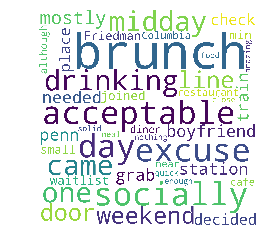

In [63]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
STOPWORDS  # returns all the stop words

<h2>word cloud comparison</h2>
<li>We'll remove short words and look only at words longer than 6 letters
<li>And then do a side by side comparison of the word clouds for our four restaurants

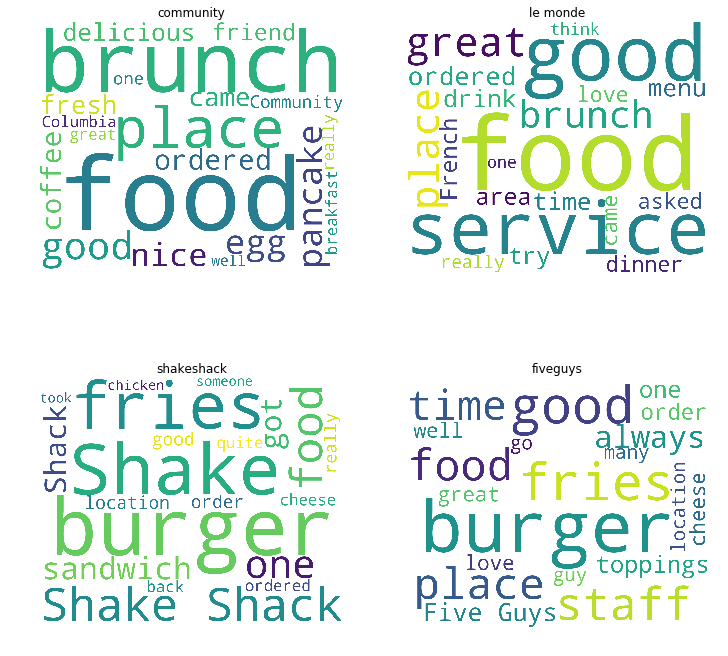

In [64]:
# Examples of pre-processing the data:
texts = restaurant_data
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
#Remove unwanted words
#As we look at the cloud, we can get rid of words that don't make sense by adding them to this variable
DELETE_WORDS = []   # add words to list to delete/remove
def remove_words(text_string,DELETE_WORDS=DELETE_WORDS):
    for word in DELETE_WORDS:
        text_string = text_string.replace(word,' ')  # replaces words with empty space
    return text_string

#Remove short words
MIN_LENGTH = 0
def remove_short_words(text_string,min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' '+word+' ',' ',1)
    return text_string


#Set up side by side clouds
COL_NUM = 2
ROW_NUM = 2
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i in range(0,len(texts)):
    text_string = remove_words(texts[i][1])
    text_string = remove_short_words(text_string)
    ax = axes[i//2, i%2] 
    ax.set_title(texts[i][0])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()

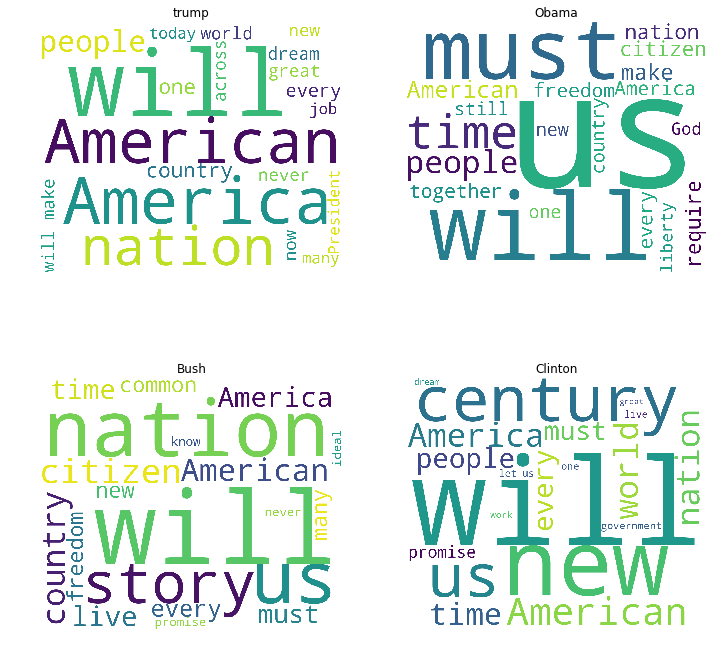

In [65]:
texts = [('trump',inaugural.raw('2017-Trump.txt')),('Obama',inaugural.raw('2013-Obama.txt')),
         ('Bush',inaugural.raw('2001-Bush.txt')),('Clinton',inaugural.raw('1997-Clinton.txt'))]
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
#Remove unwanted words
#As we look at the cloud, we can get rid of words that don't make sense by adding them to this variable
DELETE_WORDS = []
def remove_words(text_string,DELETE_WORDS=DELETE_WORDS):
    for word in DELETE_WORDS:
        text_string = text_string.replace(word,' ')
    return text_string

#Remove short words
MIN_LENGTH = 0
def remove_short_words(text_string,min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' '+word+' ',' ',1)
    return text_string


#Set up side by side clouds
COL_NUM = 2
ROW_NUM = 2
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i in range(0,len(texts)):
    text_string = remove_words(texts[i][1])
    text_string = remove_short_words(text_string)
    ax = axes[i//2, i%2] 
    ax.set_title(texts[i][0])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()

<h1>Simple Analysis: Complexity</h1>
<h4>We'll look at four complexity factors</h4>
<li>average word length: longer words adds to complexity
<li>average sentence length: longer sentences are more complex (unless the text is rambling!)
<li>vocabulary: the ratio of unique words used to the total number of words (more variety, more complexity)

<b>token:</b> A sequence (or group) of characters of interest. For e.g., in the below analysis, a token = a word
<li>Generally: A token is the base unit of analysis</li>
<li>So, the first step is to convert text into tokens and nltk text object</li>

In [69]:
#Construct tokens (words/sentences) from the text
text = le_monde_data.raw()
import nltk
from nltk import sent_tokenize,word_tokenize 
sentences = nltk.Text(sent_tokenize(text))
print(len(sentences))
words = nltk.Text(word_tokenize(text))
print(len(words))

188
2595


In [74]:
num_chars=len(text)
num_words=len(word_tokenize(text))
num_sentences=len(sent_tokenize(text))
vocab = {x.lower() for x in word_tokenize(text)}  # put all words/tokens into a set, so that you get the unique words
print(num_chars,int(num_chars/num_words),int(num_words/num_sentences),(len(vocab)/num_words))


12332 4 13 0.29132947976878615


<h4>Functionalize this</h4>

In [75]:
def get_complexity(text):
    num_chars=len(text)
    num_words=len(word_tokenize(text))
    num_sentences=len(sent_tokenize(text))
    vocab = {x.lower() for x in word_tokenize(text)}
    return len(vocab),int(num_chars/num_words),int(num_words/num_sentences),len(vocab)/num_words

In [ ]:
get_complexity(le_monde_data.raw())

In [76]:
for text in restaurant_data:
    (vocab,word_size,sent_size,vocab_to_text) = get_complexity(text[1])
    print("{0:15s}\t{1:1.2f}\t{2:1.2f}\t{3:1.2f}\t{4:1.2f}".format(text[0],vocab,word_size,sent_size,vocab_to_text))

community      	1029.00	4.00	16.00	0.28
le monde       	756.00	4.00	13.00	0.29
shakeshack     	711.00	4.00	16.00	0.28
fiveguys       	597.00	4.00	16.00	0.30


<h3>Comparing complexity of restaurant reviews won't get us anything useful</h3>
<h3>Let's look at something more useful</h3>

<h4>Let's look at the complexity of the speeches by four presidents</h4>

In [77]:
inaugural_texts = [('trump',inaugural.raw('2017-Trump.txt')),
         ('obama',inaugural.raw('2013-Obama.txt')),
         ('jackson',inaugural.raw('1829-Jackson.txt')),
         ('washington',inaugural.raw('1789-Washington.txt'))]
for text in inaugural_texts:
    (vocab,word_size,sent_size,vocab_to_text) = get_complexity(text[1])
    print("{0:15s}\t{1:1.2f}\t{2:1.2f}\t{3:1.2f}\t{4:1.2f}".format(text[0],vocab,word_size,sent_size,vocab_to_text))

trump          	540.00	5.00	18.00	0.32
obama          	788.00	5.00	26.00	0.34
jackson        	504.00	5.00	48.00	0.42
washington     	604.00	5.00	66.00	0.39


<h2>Analysis over time</h2>


<h3>The files are arranged over time so we can analyze how complexity has changed between Washington and Trump</h3>

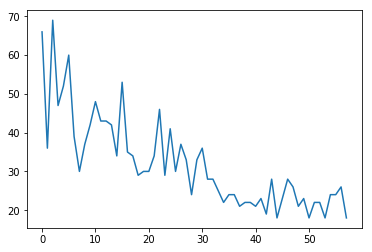

In [81]:
from nltk.corpus import inaugural
sentence_lengths = list()
for fileid in inaugural.fileids():
    sentence_lengths.append(get_complexity(' '.join(inaugural.words(fileid)))[2])
plt.plot(sentence_lengths)

There is a steady decline in sentence length of inaugural speeches over time

In [82]:
inaugural.words('1789-Washington.txt')
# type(inaugural)
# inaugural.raw('1789-Washington.txt')

<h1>dispersion plots</h1>
<h2>Dispersion plots show the relative frequency of words over the text</h2>
<h3>Let's see how the frequency of some words has changed over the course of the republic</h3>
<h3>That should give us some idea of how the focus of the nation has changed</h3>

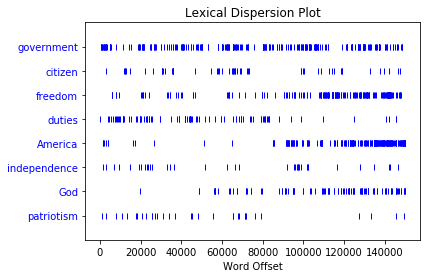

In [84]:
text4.dispersion_plot(["government", "citizen", "freedom", "duties", "America",'independence','God','patriotism'])

<h4>You can use dispersion plots to identify important characters in a book</h4>
<li>The main characters in Sense and Sensibility are Elinor, Marianne, Edward, and Willoughby
<li>Who are the more important, the men or the women?

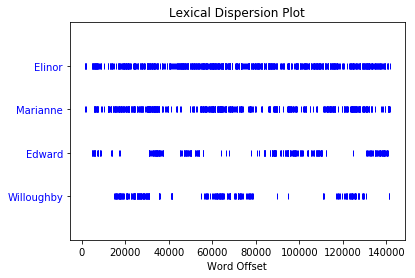

In [86]:

text2.dispersion_plot(['Elinor','Marianne','Edward','Willoughby'])

<h4>Of the characters in the book, which are likely major and which minor?</h4>

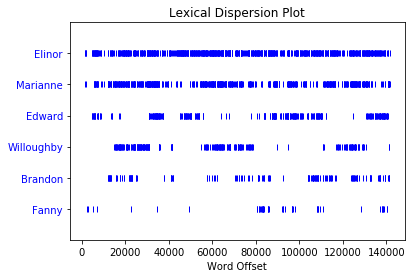

In [87]:
text2.dispersion_plot(['Elinor','Marianne','Edward','Willoughby','Brandon','Fanny'])

<h2>Stemming</h2>

<h4>We may want to use word stems rather than the part of speect form</h4>
<li>For example: patriot, patriotic, patriotism all express roughly the same idea
<li>nltk has a stemmer that implements the "Porter Stemming Algorithm" (https://tartarus.org/martin/PorterStemmer/)
<li>We'll push everything to lowercase as well

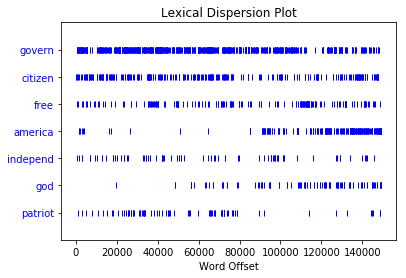

In [88]:
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()
text = inaugural.raw()
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')
sentences = sent_tokenize(striptext)
words = word_tokenize(striptext)
text = nltk.Text([p_stemmer.stem(i).lower() for i in words])
text.dispersion_plot(["govern", "citizen", "free", "america",'independ','god','patriot'])

Dispersion plot over the stemmed version of each word

<h2>Weighted sentiment analysis using Vader</h2>
<h4>Vader contains a list of 7500 features weighted by how positive or negative they are</h4>
<h4>It uses these features to calculate stats on how positive, negative and neutral a passage is</h4>
<h4>And combines these results to give a compound sentiment (higher = more positive) for the passage</h4>
<h4>Human trained on twitter data and generally considered good for informal communication</h4>
<h4>10 humans rated each feature in each tweet in context from -4 to +4</h4>
<h4>Calculates the sentiment in a sentence using word order analysis</h4>
<li>"marginally good" will get a lower positive score than "extremely good"
<h4>Computes a "compound" score based on heuristics (between -1 and +1)</h4>
<h4>Includes sentiment of emoticons, punctuation, and other 'social media' lexicon elements</h4>


In [ ]:
!source activate py36;pip install vaderSentiment

In [89]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [90]:
headers = ['pos','neg','neu','compound']
texts = restaurant_data
analyzer = SentimentIntensityAnalyzer()
for i in range(len(texts)):
    name = texts[i][0]
    sentences = sent_tokenize(texts[i][1])
    pos=compound=neu=neg=0
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        pos+=vs['pos']/(len(sentences))
        compound+=vs['compound']/(len(sentences))
        neu+=vs['neu']/(len(sentences))
        neg+=vs['neg']/(len(sentences))
    print(name,pos,neg,neu,compound)

community 0.20231531531531521 0.026099099099099105 0.7715900900900892 0.33487432432432435
le monde 0.17217021276595745 0.04306914893617022 0.7847712765957447 0.2149292553191488
shakeshack 0.11929487179487183 0.08801923076923074 0.7926794871794863 0.07660192307692311
fiveguys 0.24043801652892563 0.03497520661157026 0.7245785123966941 0.31504710743801667


<h4>And functionalize this as well</h4>

In [91]:
def vader_comparison(texts):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    headers = ['pos','neg','neu','compound']
    print("Name\t",'  pos\t','neg\t','neu\t','compound')
    analyzer = SentimentIntensityAnalyzer()
    for i in range(len(texts)):
        name = texts[i][0]
        sentences = sent_tokenize(texts[i][1])
        pos=compound=neu=neg=0
        for sentence in sentences:
            vs = analyzer.polarity_scores(sentence)
            pos+=vs['pos']/(len(sentences))
            compound+=vs['compound']/(len(sentences))
            neu+=vs['neu']/(len(sentences))
            neg+=vs['neg']/(len(sentences))
        print('%-10s'%name,'%1.2f\t'%pos,'%1.2f\t'%neg,'%1.2f\t'%neu,'%1.2f\t'%compound)

In [92]:
vader_comparison(restaurant_data)

Name	   pos	 neg	 neu	 compound
community  0.20	 0.03	 0.77	 0.33	
le monde   0.17	 0.04	 0.78	 0.21	
shakeshack 0.12	 0.09	 0.79	 0.08	
fiveguys   0.24	 0.03	 0.72	 0.32	


In [93]:
vader_comparison(inaugural_texts)


Name	   pos	 neg	 neu	 compound
trump      0.20	 0.06	 0.74	 0.23	
obama      0.17	 0.05	 0.78	 0.32	
jackson    0.19	 0.03	 0.78	 0.61	
washington 0.17	 0.05	 0.79	 0.58	


<h1>Named Entity Detection</h1>
<h4>People, places, organizations</h4>
Named entities are often the subject of sentiments so identifying them can be very useful

<h4>Named entity detection is based on Part-of-speech tagging of words and chunks (groups of words)</h4>
<li>Start with sentences (using a sentence tokenizer)
<li>tokenize words in each sentence
<li>chunk them. ne_chunk identifies likely chunked candidates (ne = named entity)
<li>Finally build chunks using nltk's guess on what members of chunk represent (people, place, organization)


<li>english pickle in the 'punkt' package contains english grammar information
<li>we can load it and then use it to parse a sentence into constituent sentences

In [1]:
import nltk
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
sample_text = """
I was walking along thinking of many things. For e.g., I walked with my friend Bilkees Bijou through the campus of Columbia University. I 
thought of birds, of bees, of sealing wax. I thought of cabbages and kings.
"""

sent_detector.tokenize(sample_text)  # tokenize into separate sentences (not words)

['\nI was walking along thinking of many things.',
 'For e.g., I walked with my friend Bilkees Bijou through the campus of Columbia University.',
 'I \nthought of birds, of bees, of sealing wax.',
 'I thought of cabbages and kings.']

<h4>word_tokenize collects the words from a sentence</h4>

In [2]:
word_list = nltk.word_tokenize(sent_detector.tokenize(sample_text)[1])  # word tokenize
word_list
# word_list2 = nltk.word_tokenize(sent_detector.tokenize(sample_text2)[1])  
# word_list

['For',
 'e.g.',
 ',',
 'I',
 'walked',
 'with',
 'my',
 'friend',
 'Bilkees',
 'Bijou',
 'through',
 'the',
 'campus',
 'of',
 'Columbia',
 'University',
 '.']

This is a bag-of-words model. You're reducing the document to a bunch of words and analyzing it at the word level, for each sentence.

<h4>pos_tag tags the word with nltk's best guess as to the part of speech</h4>
<li>nltk uses Penn Treebank tagging</li>
<li>https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [97]:
nltk.pos_tag(word_list)


[('For', 'IN'),
 ('e.g.', 'NN'),
 (',', ','),
 ('I', 'PRP'),
 ('walked', 'VBD'),
 ('with', 'IN'),
 ('my', 'PRP$'),
 ('friend', 'NN'),
 ('Bilkees', 'NNP'),
 ('Bijou', 'NNP'),
 ('through', 'IN'),
 ('the', 'DT'),
 ('campus', 'NN'),
 ('of', 'IN'),
 ('Columbia', 'NNP'),
 ('University', 'NNP'),
 ('.', '.')]

<h4>ne_chunk creates a "Sentence Tree" of parts of speech using a tokenized list of words</h4>
<li>words that are candidate entities have an attribute "label"
<li>named-entity chunking - creates a tree of all the words that appeared in the sentence. For certain things that it identified as named entities, it creates sub-trees within that tree. The leaves of a single sub-tree are all part of the same entity, or what it identifies as a single entity. In the example below, it identified 'Bijou' and 'Bilkees' as the same person, and 'Columbia' and 'University' as a single organization.

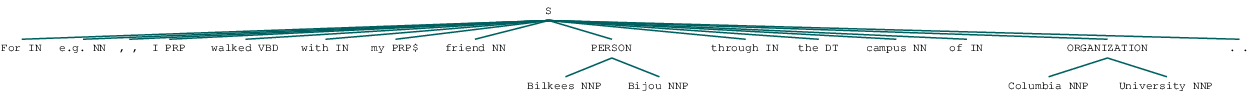

In [106]:
tagged = nltk.pos_tag(word_list)
chunked = nltk.ne_chunk(tagged)
chunked

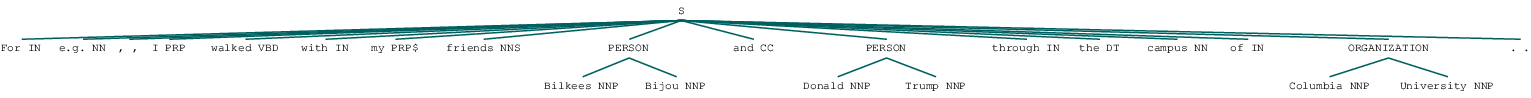

In [144]:
sample_text2 = """
I was walking along thinking of many things. For e.g., I walked with my friends Bilkees Bijou and Donald Trump through the campus of Columbia University. I 
thought of birds, of bees, of sealing wax. I thought of cabbages and kings.
"""

word_list2 = nltk.word_tokenize(sent_detector.tokenize(sample_text2)[1])
tagged2 = nltk.pos_tag(word_list2)
# nltk.ne_chunk(tagged2)
chunked2 = nltk.ne_chunk(tagged2)
chunked2

<h4>hasattr() is a python function that checks whether a name is an attribute of an object

In [100]:
class my_class(object):
    def __init__(self,x):
        name = x
    def check(self):
        return self.name
y = my_class('Jack')
hasattr(y,'check')

True

In [101]:
chunked[-2].label()

'ORGANIZATION'

In [ ]:
chunked2[-2].leaves()

In [107]:
for j in chunked:
    try:
        print(j,j.label())   # only prints parts of the tree for which there is a label.
    except:
        continue

(PERSON Bilkees/NNP Bijou/NNP) PERSON
(ORGANIZATION Columbia/NNP University/NNP) ORGANIZATION


In [ ]:
for j in chunked2:
    try:
        print(j,j.label())
    except:
        continue

In [109]:
en={}
try:
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    #sentences = sent_detector.tokenize(community_data.raw().strip())
    sentences = sent_detector.tokenize(sample_text)
    for sentence in sentences:
            tokenized = nltk.word_tokenize(sentence)
            tagged = nltk.pos_tag(tokenized)
            chunked = nltk.ne_chunk(tagged)
            for tree in chunked:
                if hasattr(tree, 'label'):
                    ne = ' '.join(c[0] for c in tree.leaves())
                    print(ne)
                    en[ne] = [tree.label(), ' '.join(c[1] for c in tree.leaves())]
except Exception as e:
    print(str(e))
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(en)

Bilkees Bijou
Columbia University
{   'Bilkees Bijou': ['PERSON', 'NNP NNP'],
    'Columbia University': ['ORGANIZATION', 'NNP NNP']}


In [ ]:
chunked

<h4>We can now do this on our actual text. Let's try with community_data</h4>

In [111]:
en={}
try:
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = sent_detector.tokenize(community_data.raw().strip())
    for sentence in sentences:
            tokenized = nltk.word_tokenize(sentence)
            tagged = nltk.pos_tag(tokenized)
            chunked = nltk.ne_chunk(tagged)
            for tree in chunked:
                if hasattr(tree, 'label'):
                    ne = ' '.join(c[0] for c in tree.leaves())
                    en[ne] = [tree.label(), ' '.join(c[1] for c in tree.leaves())]
except Exception as e:
    print(str(e))
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(en)

<h3>And functionalize this</h3>

In [112]:
def get_labeled_text(text,label_type='ALL'):
    en={}
    try:
        sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
        sentences = sent_detector.tokenize(text.strip())
        for sentence in sentences:
                tokenized = nltk.word_tokenize(sentence)
                tagged = nltk.pos_tag(tokenized)
                chunked = nltk.ne_chunk(tagged)
                for tree in chunked:
                    if hasattr(tree, 'label'):
                        if not label_type == "ALL":
                            if not tree.label() == label_type:
                                continue
                        ne = ' '.join(c[0] for c in tree.leaves())
                        en[ne] = [tree.label(), ' '.join(c[1] for c in tree.leaves())]
    except Exception as e:
        return str(e)
    return en
get_labeled_text(community_data.raw(),'ORGANIZATION')

{'BEST': ['ORGANIZATION', 'NNP'],
 'CU': ['ORGANIZATION', 'NNP'],
 'Columbia University': ['ORGANIZATION', 'NNP NNP'],
 'Community': ['ORGANIZATION', 'NNP'],
 'Community Food': ['ORGANIZATION', 'NNP NNP'],
 'Company': ['ORGANIZATION', 'NNP'],
 'Country Breakfast': ['ORGANIZATION', 'NNP NNP'],
 'FRESH': ['ORGANIZATION', 'NNP'],
 'Fire Island Beer': ['ORGANIZATION', 'NNP NNP NNP'],
 'GF': ['ORGANIZATION', 'NNP'],
 'GLUTEN': ['ORGANIZATION', 'NNP'],
 'GOOD': ['ORGANIZATION', 'JJ'],
 'GREAT FOR': ['ORGANIZATION', 'NNP NNP'],
 'HOURS': ['ORGANIZATION', 'NNP'],
 'Huevos Rancheros': ['ORGANIZATION', 'NNP NNP'],
 'Lighthouse': ['ORGANIZATION', 'NNP'],
 'NBC': ['ORGANIZATION', 'NNP'],
 'NOT': ['ORGANIZATION', 'NNP'],
 'NYC': ['ORGANIZATION', 'NNP'],
 'Newbury': ['ORGANIZATION', 'NNP'],
 'POTATO': ['ORGANIZATION', 'NNP'],
 'REAL': ['ORGANIZATION', 'JJ'],
 'THE': ['ORGANIZATION', 'NNP'],
 'Troy Barnes': ['ORGANIZATION', 'NN NNPS'],
 'VERY': ['ORGANIZATION', 'NNP'],
 'Yahoo': ['ORGANIZATION', 'NN'

<h4>Assuming we've done a good job of identifying named entities, we can get an affect score on entities</h4>

In [113]:
meaningful_sents = list()
i=0
for sentence in sentences:
    if 'service' in sentence:
        i+=1
        meaningful_sents.append((i,sentence))  # Sentences with the word 'service' is mentioned are pulled. We are interested in these sentences.

vader_comparison(meaningful_sents)       

Name	   pos	 neg	 neu	 compound
1          0.00	 0.00	 1.00	 0.00	
2          0.11	 0.15	 0.73	 -0.17	
3          0.53	 0.00	 0.47	 0.84	
4          0.28	 0.00	 0.71	 0.49	
5          0.23	 0.00	 0.78	 0.49	
6          0.36	 0.00	 0.64	 0.74	


<h4>We could also develop a affect calculator for common terms in our domain (e.g., food items)</h4>

In [114]:
def get_affect(text,word,lower=True):
    import nltk
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = sent_detector.tokenize(text.strip())
    sentence_count = 0
    running_total = 0
    for sentence in sentences:
        if lower: 
            sentence = sentence.lower()
            word = word.lower()
        if word in sentence:
            vs = analyzer.polarity_scores(sentence) 
            running_total += vs['compound']
            sentence_count += 1
    if sentence_count == 0: return 0
    return running_total/sentence_count

<h4>And compare different texts on the affect score of the terms</h4>

In [115]:
print(get_affect(community_data.raw(),'service',True))
print(get_affect(le_monde_data.raw(),'service',True))
print(get_affect(shakeshack_data.raw(),'service',True))
print(get_affect(fiveguys_data.raw(),'service',True))

0.4321428571428571
0.22273125
0.75735
0.4939


<h4>Or look for the "good" and "bad" characters in a piece of text</h4>

In [116]:
print(get_affect(gutenberg.raw('shakespeare-hamlet.txt'),'Gertrude',False))
print(get_affect(gutenberg.raw('shakespeare-hamlet.txt'),'Hamlet',False))
print(get_affect(gutenberg.raw('shakespeare-hamlet.txt'),'Horatio',False))


-0.0009083333333333351
0.0712683673469388
0.09202820512820513


<h3>We can apply this to any text</h3>

In [121]:
get_labeled_text(inaugural.raw('2017-Trump.txt'))

{'America': ['GPE', 'NNP'],
 'American': ['GPE', 'JJ'],
 'Americans': ['GPE', 'NNPS'],
 'Bible': ['ORGANIZATION', 'NNP'],
 'Bush': ['PERSON', 'NNP'],
 'Carter': ['PERSON', 'NNP'],
 'Clinton': ['PERSON', 'NNP'],
 'D.C.': ['GPE', 'NNP'],
 'Detroit': ['GPE', 'NNP'],
 'Earth': ['LOCATION', 'NNP'],
 'Everyone': ['GPE', 'NN'],
 'First Lady Michelle Obama': ['PERSON', 'NNP NNP NNP NNP'],
 'God': ['PERSON', 'NNP'],
 'Islamic': ['ORGANIZATION', 'NNP'],
 'Justice Roberts': ['ORGANIZATION', 'NNP NNP'],
 'Nebraska': ['GPE', 'NNP'],
 'Obama': ['PERSON', 'NNP'],
 'United States': ['GPE', 'NNP NNPS'],
 'Washington': ['GPE', 'NNP']}

In [120]:
for key in get_labeled_text(inaugural.raw('2009-Obama.txt'),'PERSON'):
    print(key,get_affect(inaugural.raw('2009-Obama.txt'),key))

Bush 0.7845
Khe Sahn -0.5267
Gross Domestic Product 0.9178
Muslims 0.0
Jews 0.0
God 0.7562800000000001


In [123]:
for key in get_labeled_text(inaugural.raw('2017-Trump.txt'),'PERSON'):
    print(key,get_affect(inaugural.raw('2017-Trump.txt'),key))

<h4>The nltk function concordance prints text fragments around a word</h4>
<li>Useful for a quick look but it "prints" not "returns"

In [125]:
nltk.Text(community_data.words()).concordance('Columbia',100)

In [ ]:
x = nltk.Text(community_data.words())

In [ ]:
community_data.words()

In [ ]:
nltk.Text(nltk.word_tokenize(inaugural.raw('2009-obama.txt'))).concordance('Sahn',100)